In [2]:
import pandas as pd
import numpy as np

import matplotlib

import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix

from sklearn import model_selection #import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics  # mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
from sklearn.feature_selection import SelectFromModel, RFECV


matplotlib.style.use('ggplot')
%matplotlib inline  


### Load Training Data:

In [3]:
#dataset column names:

col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# id: engine id
# cycle: cycle number. a sequence starts from 1 to the cycle # where failure has happened
# setting?: engine setting
# s1 to s21: sensors measurments on each cycle
# the dataset contains data of 100 engines with each engine run for number cycles to failure

In [4]:
#load training data

df_train_raw = pd.read_csv('data/PM_train.txt', sep = ' ', header=None)
df_train_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [5]:
#drop extra space columnn
df_train_raw.drop([26,27], axis=1, inplace='True')

In [6]:
#assign column names
df_train_raw.columns = col_names
df_train_raw.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
df_train_raw.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [8]:

def prepare_train_data (df_in, period):
    
    """
    df_in: input dataframe
    period: number of cycles used in classification modelling
    returns the input dataframe with additional 3 label columns: ttf, label_bnc, and label_mcc
    
    add labels to the training data:
        for regression: ttf (time-to-failure) = each cycle# for an engine subtracted from the last cycle# of the same engine
        for binary classification: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        for multi-class classification: label_mcc = 2 if ttf <= 0.5*period paramter, 1 if ttf<= period, else 2 (values = 0,1,2)
    """
    
    #create regression label
    
    #make a dataframe to hold the last cycle for each enginge in the dataset
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0, inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']
    
    #add time-to-failure ttf as a new column - regression label
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
    df_in.drop(['last_cycle'], axis=1, inplace='True')
    
    #create binary classification label
    df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_in['label_mcc'] = df_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)
    
    return df_in
    

In [9]:
#add labels to training dataframe

df_train = prepare_train_data (df_train_raw, 30)
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0,0


### Load Test Data:

In [10]:
#load testing data

df_test_raw = pd.read_csv('data/PM_test.txt', sep = ' ', header=None)
df_test_raw.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [11]:
#drop extra space columnn
df_test_raw.drop([26,27], axis=1, inplace='True')

#assign column names
df_test_raw.columns = col_names
df_test_raw.head()


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [12]:
# Load the truth data - actual 'ttf' for test data

df_truth = pd.read_csv('data/PM_truth.txt', sep = ' ', header=None)
df_truth.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [13]:
#drop extra empty column and rename remaining 'ttf'

df_truth.drop([1], axis=1, inplace='True')
df_truth.columns = ['ttf']
df_truth.head()

,ttf
0,112
1,98
2,69
3,82
4,91


In [14]:
def prepare_test_data(df_test_in, df_truth_in, period):
    
    """
    extract the last cycle for each enginge id to get the last record for each engine
    add the truth dataframe column to test dataframe as lable 'ttf'
    add other classification labels
    
    """
    
    df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())
    
    df_tst_last_cycle.reset_index(level=0, inplace=True)
    df_tst_last_cycle.columns = ['id', 'last_cycle']
    
    df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')


    df_test_in = df_test_in[df_test_in['cycle'] == df_test_in['last_cycle']]

    df_test_in.drop(['last_cycle'], axis=1, inplace='True')
    
    df_test_in.reset_index(drop=True, inplace=True)
    
    df_test_in = pd.concat([df_test_in, df_truth], axis=1)
    
    #create binary classification label
    df_test_in['label_bnc'] = df_test_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_test_in['label_mcc'] = df_test_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

    return df_test_in

In [15]:
df_test = prepare_test_data(df_test_raw, df_truth, 30)
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,8.4024,0.03,393,2388,100.0,38.81,23.3552,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,8.4505,0.03,391,2388,100.0,38.81,23.2618,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,8.4119,0.03,395,2388,100.0,38.93,23.2740,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,8.4634,0.03,395,2388,100.0,38.58,23.2581,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,8.4362,0.03,394,2388,100.0,38.75,23.4117,91,0,0


### Regression Modelling before Feature Engineering & Selection:

In [16]:
#Prepare data for regression model

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
sensor_cols = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']


X_train = df_train[features_orig]
y_train = df_train['ttf']

X_test = df_test[features_orig]
y_test = df_test['ttf']

In [17]:
def get_regression_metrics(model, actual, predicted):
    
    """
    
    
    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R Squared' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [18]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    
    """
    
    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None
    

In [19]:
#try linear regression

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
y_predict = linreg.predict(X_test)

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_predict)
linreg_metrics


,Linear Regression
Root Mean Squared Error,32.041095
R Squared,0.405495
Mean Absolute Error,25.591780
Explained Variance,0.665297


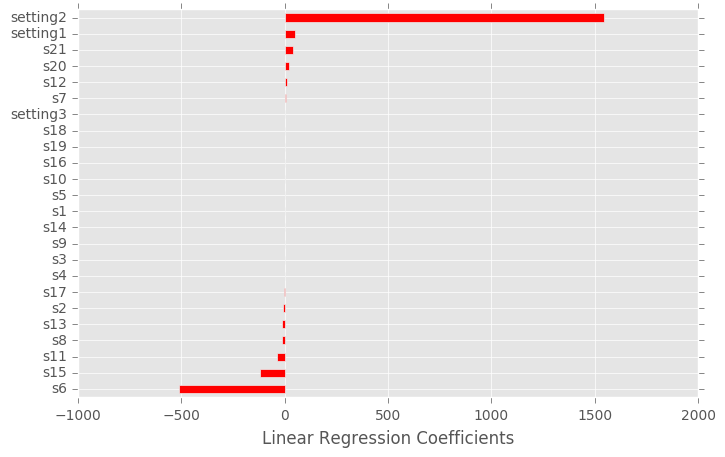

In [20]:
plot_features_weights('Linear Regression', linreg.coef_, X_train.columns, 'c')

In [21]:
#try LASSO

lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_predict = lasso.predict(X_test)

lasso_metrics = get_regression_metrics('LASSO', y_test, y_predict)

lasso_metrics


,LASSO
Root Mean Squared Error,31.966099
R Squared,0.408275
Mean Absolute Error,25.551808
Explained Variance,0.668206


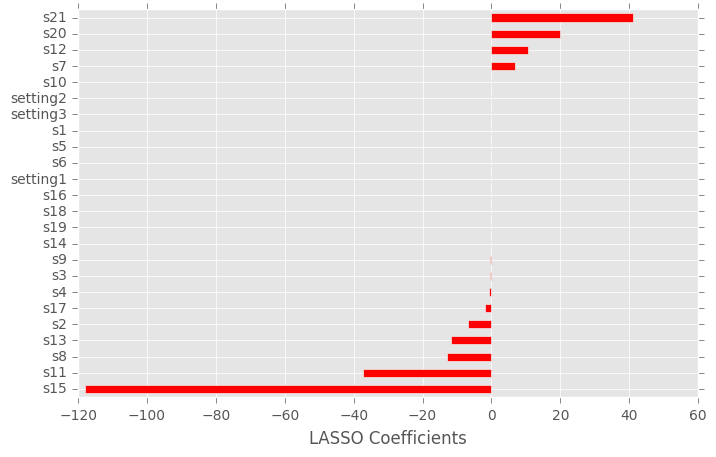

In [22]:
plot_features_weights('LASSO', lasso.coef_, X_train.columns, 'c')

In [23]:
#try ridge

rdg = linear_model.Ridge(alpha=0.1)
rdg.fit(X_train, y_train)

y_predict = rdg.predict(X_test)

rdg_metrics = get_regression_metrics('Ridge Regression', y_test, y_predict)
rdg_metrics

,Ridge Regression
Root Mean Squared Error,31.955499
R Squared,0.408668
Mean Absolute Error,25.541142
Explained Variance,0.668214


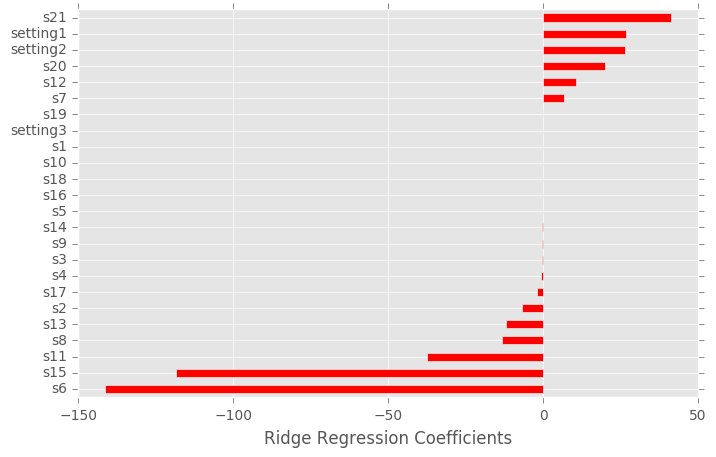

In [24]:
plot_features_weights('Ridge Regression', rdg.coef_, X_train.columns, 'c')

In [25]:
#try Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)
y_predict = polyreg.predict(X_test_poly)

polyreg_metrics = get_regression_metrics('Polynomial Regression', y_test, y_predict)
polyreg_metrics



,Polynomial Regression
Root Mean Squared Error,30.815917
R Squared,0.450091
Mean Absolute Error,23.337656
Explained Variance,0.633342


In [26]:
#try Random Forest

rf = RandomForestRegressor(n_estimators=20, max_features=6, max_depth=5, n_jobs=-1, random_state=1)
rf.fit(X_train, y_train)

y_predict = rf.predict(X_test)

rf_metrics = get_regression_metrics('Random Forest Regression', y_test, y_predict)
rf_metrics

,Random Forest Regression
Root Mean Squared Error,29.784864
R Squared,0.486274
Mean Absolute Error,23.114413
Explained Variance,0.731808


__Note:__ Manually manipulated RandomForestRegressor parameters to get the best metrics. This hyper parameter tuning can be done with grid or random search.

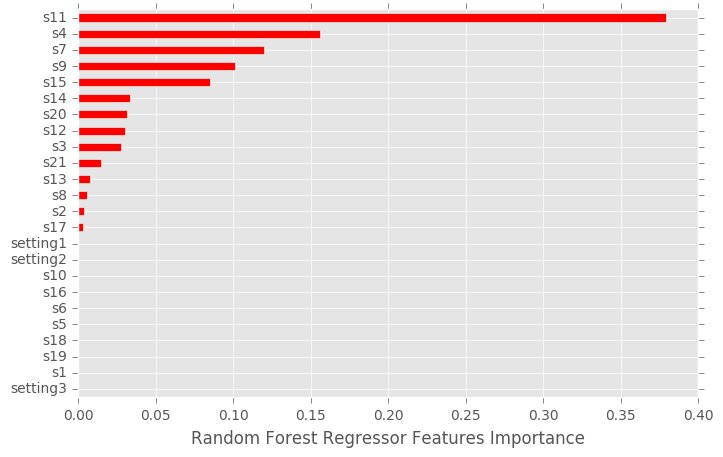

In [27]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns, 't' )

In [28]:
#regression metrics comparison before feature engineering

reg_metrics_bfe = pd.concat([linreg_metrics, lasso_metrics, rdg_metrics, polyreg_metrics, rf_metrics], axis=1)
reg_metrics_bfe

,Linear Regression,LASSO,Ridge Regression,Polynomial Regression,Random Forest Regression
Root Mean Squared Error,32.041095,31.966099,31.955499,30.815917,29.784864
R Squared,0.405495,0.408275,0.408668,0.450091,0.486274
Mean Absolute Error,25.591780,25.551808,25.541142,23.337656,23.114413
Explained Variance,0.665297,0.668206,0.668214,0.633342,0.731808


__Note:__  

The above table compares regression models performance metrics. It is clear that Random Forest Regressor likely to perform better than other models. The hyperparameter tuning for the Random Forest Regressor, LASSO, and Ridge models was done manually, but Grid Search or Random Search with Cross Validation could be used for better processing.  

Let us add some new features to assess their effects in models performance. These new features were mainly configured from smoothing the time series readings of sensors using rolling average and rolling standard deviation.



### Feature Engineering:

In [29]:
def add_features(df_in, rolling_win_size):
    
    """
    add rolling average and rolling standard deviation for sensors readings using fixed rolling window size
    
    
    """
    
    sensor_av_cols = [nm.replace('s', 'av') for nm in sensor_cols]
    sensor_sd_cols = [nm.replace('s', 'sd') for nm in sensor_cols]
    
    df_out = pd.DataFrame()
    
    ws = rolling_win_size
    
    #calculate rolling stats for each engine id
    
    for m_id in pd.unique(df_in.id):
    
        # get a subset for each engine sensors
        df_engine = df_in[df_in['id'] == m_id]
        df_sub = df_engine[sensor_cols]

    
        # get rolling mean for the subset
        av = df_sub.rolling(ws, min_periods=1).mean()
        av.columns = sensor_av_cols
    
        # get the rolling standard deviation for the subset
        sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
        sd.columns = sensor_sd_cols
    
        # combine the two new subset dataframes columns to the engine subset
        new_ftrs = pd.concat([df_engine,av,sd], axis=1)
    
        # add the new features rows to the output dataframe
        df_out = pd.concat([df_out,new_ftrs])
        
    return df_out


In [30]:
#create training dataframe that include new features with window size = 5

df_train_fe = add_features(df_train_raw, 5)
df_train_fe.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.438406,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.404475,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.495950,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.432574,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498


In [31]:
#add labels to the training dataframe

df_train_fin = prepare_train_data (df_train_fe, 30)

In [32]:
#create test dataframe that include new features with window size = 5

df_test_fe = add_features(df_test_raw, 5)

In [33]:
#add labels to the test dataframe

df_test_fin = prepare_test_data (df_test_fe, df_truth, 30)

### Regression Modelling after Feature Engineering:

In [34]:
# input features

all_cols = df_train_fin.columns.tolist()

#exclude labels, id, and cycle

exc_cols = ['id', 'cycle', 'ttf', 'label_bnc','label_mcc']
features = [i for i in all_cols if i not in exc_cols]

print(str(len(features)) + ' features:\n')
print(features)

66 features:

['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']


In [35]:
# prepare regression training and test data


X_train_fe, y_train_fe = df_train_fin[features], df_train_fin['ttf']
X_test_fe, y_test_fe = df_test_fin[features], df_test_fin['ttf']


In [36]:
#try Linear Regression after feature engineering

linreg = linear_model.LinearRegression()
linreg.fit(X_train_fe, y_train_fe)


y_predict = linreg.predict(X_test_fe)

linreg_fe_metrics = get_regression_metrics('Linear Regression', y_test_fe, y_predict)

linreg_fe_metrics



,Linear Regression
Root Mean Squared Error,33.567597
R Squared,0.347499
Mean Absolute Error,27.188279
Explained Variance,0.630618


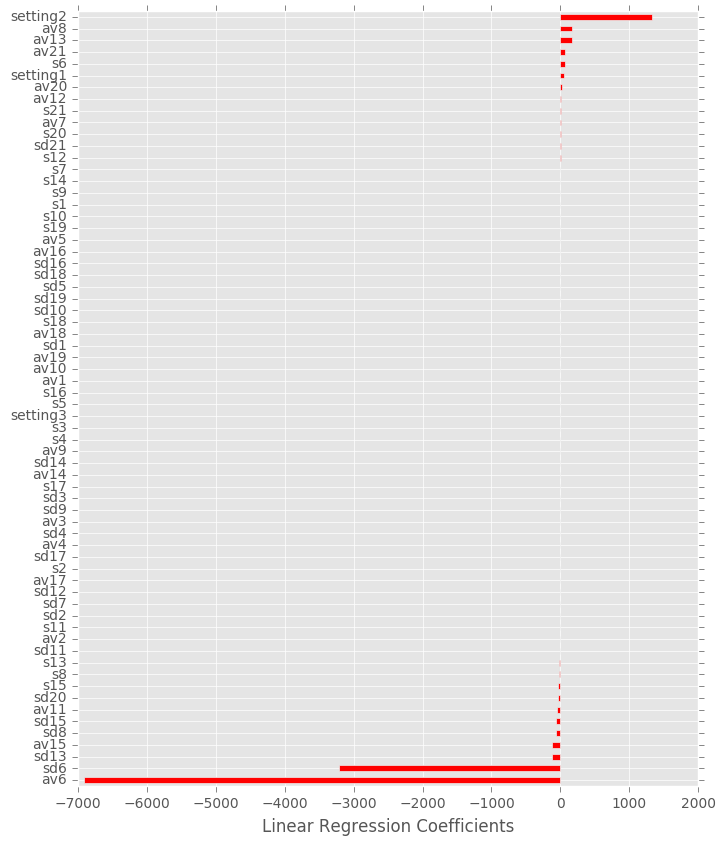

In [37]:
plot_features_weights('Linear Regression', linreg.coef_, X_train_fe.columns, 'c')

In [38]:
#try lASSO after feature engineering

lasso = linear_model.Lasso(alpha=0.04)
lasso.fit(X_train_fe, y_train_fe)

y_predict = lasso.predict(X_test_fe)

lasso_fe_metrics = get_regression_metrics('LASSO', y_test_fe, y_predict)

lasso_fe_metrics


,LASSO
Root Mean Squared Error,33.159025
R Squared,0.363287
Mean Absolute Error,26.674360
Explained Variance,0.645954


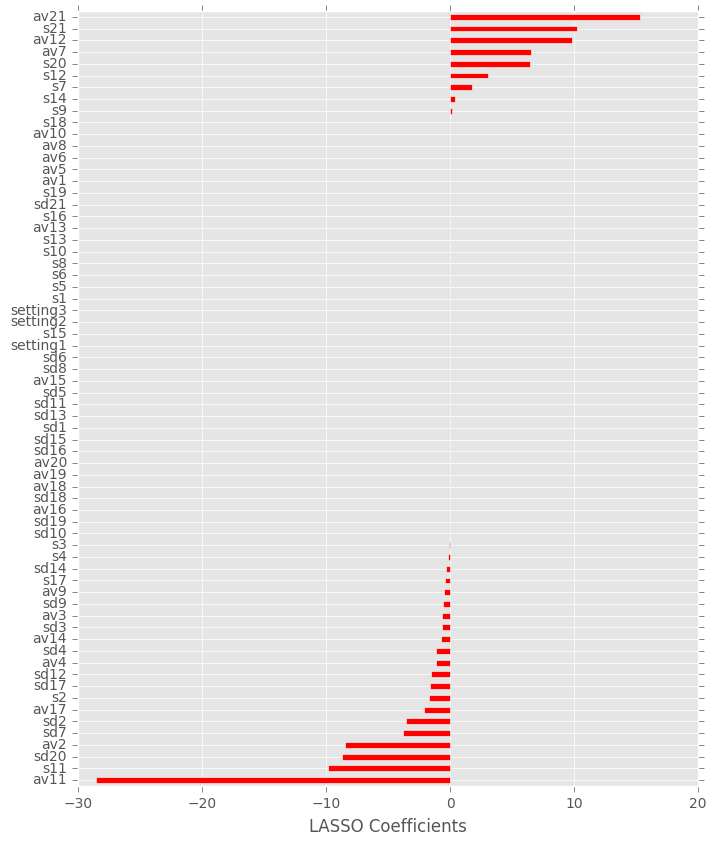

In [39]:
plot_features_weights('LASSO', lasso.coef_, X_train_fe.columns, 'c')

In [40]:
#try Ridge Regression after feature engineering

rdg = linear_model.Ridge(alpha=1.0)
rdg.fit(X_train_fe, y_train_fe)

y_predict = rdg.predict(X_test_fe)

rdg_fe_metrics = get_regression_metrics('Ridge', y_test_fe, y_predict)

rdg_fe_metrics


,Ridge
Root Mean Squared Error,33.609873
R Squared,0.345855
Mean Absolute Error,27.173600
Explained Variance,0.631833


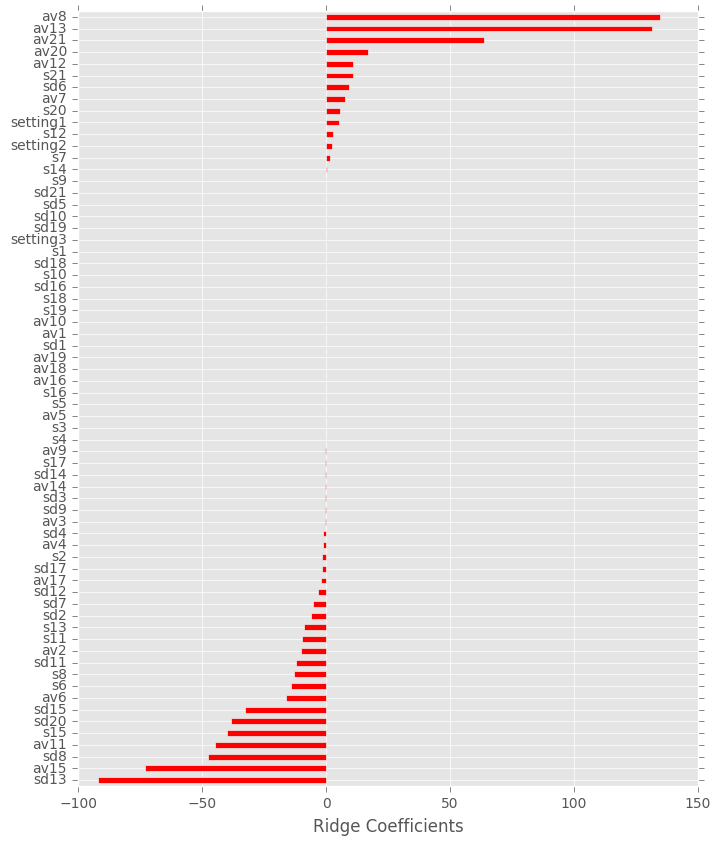

In [41]:
plot_features_weights('Ridge', rdg.coef_, X_train_fe.columns, 'c')

In [42]:
#try Random Forest after feature engineering


rf = RandomForestRegressor(n_estimators=20, max_features=3, max_depth=5, n_jobs=-1, random_state=1)
rf.fit(X_train_fe, y_train_fe)

y_predict = rf.predict(X_test_fe)

rf_fe_metrics = get_regression_metrics('Random Forest Regression', y_test_fe, y_predict)
rf_fe_metrics



,Random Forest Regression
Root Mean Squared Error,29.811360
R Squared,0.485359
Mean Absolute Error,23.793559
Explained Variance,0.720566


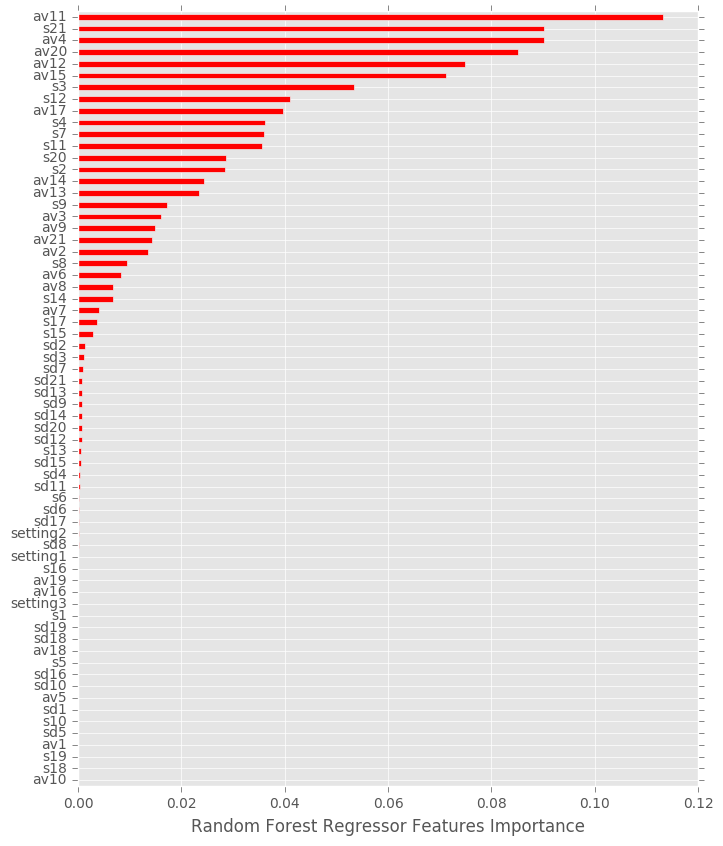

In [43]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train_fe.columns, 't' )

In [44]:
#regression metrics comparison after feature engineering

reg_metrics_afe = pd.concat([linreg_fe_metrics, lasso_fe_metrics, rdg_fe_metrics, rf_fe_metrics], axis=1)

print('regression metrics comparison after feature engineering')
reg_metrics_afe

regression metrics comparison after feature engineering


,Linear Regression,LASSO,Ridge,Random Forest Regression
Root Mean Squared Error,33.567597,33.159025,33.609873,29.811360
R Squared,0.347499,0.363287,0.345855,0.485359
Mean Absolute Error,27.188279,26.674360,27.173600,23.793559
Explained Variance,0.630618,0.645954,0.631833,0.720566


In [45]:
# regression metrics before feature engineering

print('regression metrics comparison before feature engineering')
reg_metrics_bfe

regression metrics comparison before feature engineering


,Linear Regression,LASSO,Ridge Regression,Polynomial Regression,Random Forest Regression
Root Mean Squared Error,32.041095,31.966099,31.955499,30.815917,29.784864
R Squared,0.405495,0.408275,0.408668,0.450091,0.486274
Mean Absolute Error,25.591780,25.551808,25.541142,23.337656,23.114413
Explained Variance,0.665297,0.668206,0.668214,0.633342,0.731808


__Note:__  

Comparing regression metrics before and after feature engineering (FE), only random forest regressor showed minimum improvment with FE while all other models were better before FE.

Did not try Polynomial regression after FE becasue computational complexity due high number of features.

### Features Selection:

In [46]:
# Decision Tree with all features

dtr = DecisionTreeRegressor(max_depth=7)

print(X_train_fe.shape)

dtr.fit(X_train_fe, y_train_fe)

y_predict = dtr.predict(X_test_fe)

dtr_fe_metrics = get_regression_metrics('Decision Tree: All Features', y_test_fe, y_predict)
dtr_fe_metrics



(20631, 66)


,Decision Tree: All Features
Root Mean Squared Error,33.567619
R Squared,0.347498
Mean Absolute Error,23.695536
Explained Variance,0.546332


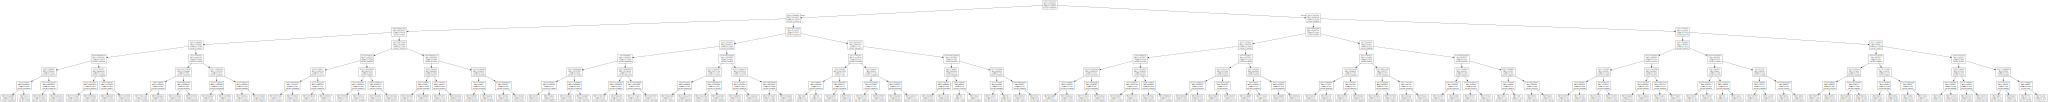

In [47]:
# view the constructed decision tree

import graphviz

export_graphviz(dtr, out_file="mytree.dot", feature_names=X_train_fe.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Optimal number of features : 3
The selected features are: ['av4', 'av9', 'av21']


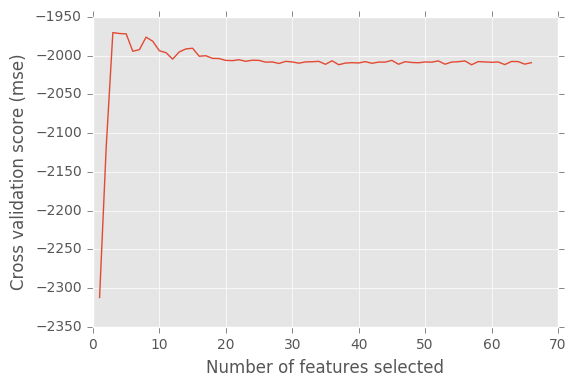

In [48]:
# try recursive feature elimination

kfold = model_selection.KFold(n_splits=5, random_state=10)

dtr = DecisionTreeRegressor(max_depth=7)

rfecv = RFECV(estimator=dtr, step=1, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
rfecv.fit(X_train_fe, y_train_fe)

print("Optimal number of features : %d" % rfecv.n_features_)

sel_features = [f for f,s in zip(X_train_fe.columns, rfecv.support_) if s]
print('The selected features are: {}'.format(sel_features))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (mse)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



In [49]:
# Decition Tree with selected features

#trnsform train and test data
X_train_trn = rfecv.transform(X_train_fe)
X_test_trn = rfecv.transform(X_test_fe)

print(X_train_trn.shape)

dtr = DecisionTreeRegressor(max_depth=7)

dtr.fit(X_train_trn, y_train_fe)

y_predict = dtr.predict(X_test_trn)

dtr_fs_metrics = get_regression_metrics('Decision Tree: Selected Features', y_test_fe, y_predict)

#combine decision tree results: All features and selected features
dtr_metrics = pd.concat([dtr_fs_metrics,dtr_fe_metrics], axis=1)

dtr_metrics

(20631, 3)


,Decision Tree: Selected Features,Decision Tree: All Features
Root Mean Squared Error,33.527116,33.567619
R Squared,0.349072,0.347498
Mean Absolute Error,24.888588,23.695536
Explained Variance,0.559876,0.546332


__Note:__  
    
Only three features has resulted performance comparable to and better than all combined 66 features. This is a true example for dimensionality reduction.

In [50]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(sel_features, dtr.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})

importances.sort_values(by='Importance', ascending=False)

,Importance
av4,0.737598
av9,0.138332
av21,0.124071


In [51]:
#try some feature selection with SelectFromModel

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

                                             
clf = LassoCV(cv=5, random_state=1)
                                             
sfm = SelectFromModel(clf, threshold=0.1)

sfm.fit(X_train_fe,y_train_fe)

X_train_fe_trn = sfm.transform(X_train_fe)
X_test_fe_trn = sfm.transform(X_test_fe)

print(X_train_fe_trn.shape)

lasso = linear_model.Lasso(alpha=0.01)

lasso.fit(X_train_fe_trn, y_train_fe)

y_predict = lasso.predict(X_test_fe_trn)


lasso_fe_trn_metrics = get_regression_metrics('LASSO: Selected Features', y_test_fe, y_predict)

lasso__metrics = pd.concat([lasso_fe_trn_metrics, lasso_fe_metrics], axis=1)
lasso__metrics


(20631, 17)


,LASSO: Selected Features,LASSO
Root Mean Squared Error,33.856343,33.159025
R Squared,0.336226,0.363287
Mean Absolute Error,27.402071,26.674360
Explained Variance,0.625125,0.645954


__Note:__
feature selection did not work well for this dataset using LASSO model.

### Binary Classification:

In [233]:
# create labels for binary classification

y_train_bnc = df_train['label_bnc']
y_test_bnc = df_test['label_bnc']

In [234]:
from sklearn import metrics


In [235]:
def get_bincalass_metrics(model, actual, predicted):
    
    """
    
    
    """
    binclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(actual, predicted),
                        'Precision' : metrics.precision_score(actual, predicted),
                        'Recall' : metrics.recall_score(actual, predicted),
                        'F1 Score' : metrics.f1_score(actual, predicted),
                        'AUC' : metrics.roc_auc_score(actual, predicted)
                   }

    #return binclass_metrics
    df_binclass_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_binclass_metrics.columns = [model]
    return df_binclass_metrics

In [236]:
# features before Feature Engneering:

features_bfe = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# features after Feature Engneering:

features_afe = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

In [237]:
def do_binary_classification(model, clfr, features):
    
    Xtrain = df_train_fin[features]
    ytrain = y_train_bnc
    
    Xtest = df_test_fin[features]
    ytest = y_test_bnc
    
    clfr.fit(Xtrain, ytrain)
    ypred = clfr.predict(Xtest)
    df_metrics = get_bincalass_metrics(model, ytest, ypred)
    
    print(model,'\n')
    print('Confusion Matrix:')
    print(metrics.confusion_matrix(ytest, ypred))
    print('\nClassification Report:')
    print(metrics.classification_report(ytest, ypred))

    return df_metrics, ypred

    


In [238]:
# try logistic regression

clf = linear_model.LogisticRegression(C=1.0, solver='lbfgs', random_state=123, n_jobs=-1)

In [239]:
# use original features -- before feature engineering

df_logreg_bfe, y_pred = do_binary_classification('Logistic Reg. Before FE', clf, features_bfe)

df_logreg_bfe.sort_index()

Logistic Reg. Before FE 

Confusion Matrix:
[[74  1]
 [11 14]]

Classification Report:
             precision    recall  f1-score   support

          0       0.87      0.99      0.93        75
          1       0.93      0.56      0.70        25

avg / total       0.89      0.88      0.87       100



,Logistic Reg. Before FE
AUC,0.773333
Accuracy,0.880000
F1 Score,0.700000
Precision,0.933333
Recall,0.560000


In [240]:
# use original features + new features after feature engineering

df_logreg_afe, y_pred = do_binary_classification('Logistic Reg. After FE', clf, features_afe)

df_logreg_afe.sort_index()

Logistic Reg. After FE 

Confusion Matrix:
[[75  0]
 [ 8 17]]

Classification Report:
             precision    recall  f1-score   support

          0       0.90      1.00      0.95        75
          1       1.00      0.68      0.81        25

avg / total       0.93      0.92      0.91       100



,Logistic Reg. After FE
AUC,0.840000
Accuracy,0.920000
F1 Score,0.809524
Precision,1.000000
Recall,0.680000


In [241]:
logreg_metrics = pd.concat([df_logreg_bfe, df_logreg_afe], axis=1)
logreg_metrics.sort_index()

,Logistic Reg. Before FE,Logistic Reg. After FE
AUC,0.773333,0.840000
Accuracy,0.880000,0.920000
F1 Score,0.700000,0.809524
Precision,0.933333,1.000000
Recall,0.560000,0.680000


In [242]:
#try Decision Tree Classifier before FE

clf = DecisionTreeClassifier(max_depth=2, random_state=123)

df_dectree_bfe, y_pred = do_binary_classification('Decision Tree Before FE', clf, features_bfe)

df_dectree_bfe.sort_index()

Decision Tree Before FE 

Confusion Matrix:
[[74  1]
 [10 15]]

Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.99      0.93        75
          1       0.94      0.60      0.73        25

avg / total       0.90      0.89      0.88       100



,Decision Tree Before FE
AUC,0.793333
Accuracy,0.890000
F1 Score,0.731707
Precision,0.937500
Recall,0.600000


In [243]:
#try Decision Tree Classifier after FE

clf = DecisionTreeClassifier(max_depth=2, random_state=123)

df_dectree_afe, y_pred = do_binary_classification('Decision Tree After FE', clf, features_afe)

df_dectree_afe.sort_index()



Decision Tree After FE 

Confusion Matrix:
[[74  1]
 [ 6 19]]

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.99      0.95        75
          1       0.95      0.76      0.84        25

avg / total       0.93      0.93      0.93       100



,Decision Tree After FE
AUC,0.873333
Accuracy,0.930000
F1 Score,0.844444
Precision,0.950000
Recall,0.760000


In [244]:
dectree_metrics = pd.concat([df_dectree_bfe, df_dectree_afe], axis=1)
dectree_metrics.sort_index()

,Decision Tree Before FE,Decision Tree After FE
AUC,0.793333,0.873333
Accuracy,0.890000,0.930000
F1 Score,0.731707,0.844444
Precision,0.937500,0.950000
Recall,0.600000,0.760000


In [245]:

from sklearn.ensemble import RandomForestClassifier


In [246]:
#try Random Forest Classifier before FE

clf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=123, n_jobs=-1)

df_rfc_bfe, y_pred = do_binary_classification('Random Forest Before FE', clf, features_bfe)

df_rfc_bfe.sort_index()

Random Forest Before FE 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.99      0.94        75
          1       0.94      0.68      0.79        25

avg / total       0.91      0.91      0.90       100



,Random Forest Before FE
AUC,0.833333
Accuracy,0.910000
F1 Score,0.790698
Precision,0.944444
Recall,0.680000


In [247]:
#try Random Forest Classifier after FE

clf = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=123, n_jobs=-1)

df_rfc_afe, y_pred = do_binary_classification('Random Forest After FE', clf, features_afe)

df_rfc_afe.sort_index()

Random Forest After FE 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.99      0.94        75
          1       0.94      0.68      0.79        25

avg / total       0.91      0.91      0.90       100



,Random Forest After FE
AUC,0.833333
Accuracy,0.910000
F1 Score,0.790698
Precision,0.944444
Recall,0.680000


In [248]:
rfc_metrics = pd.concat([df_rfc_bfe, df_rfc_afe], axis=1)
rfc_metrics.sort_index()

,Random Forest Before FE,Random Forest After FE
AUC,0.833333,0.833333
Accuracy,0.910000,0.910000
F1 Score,0.790698,0.790698
Precision,0.944444,0.944444
Recall,0.680000,0.680000


In [249]:
# try SVM rbf kernel before FE

from sklearn import svm

clf = svm.SVC(C=1.0, kernel='rbf', degree=3, random_state=123)

df_svc_bfe, y_pred = do_binary_classification('rbf SVC Before FE', clf, features_bfe)

df_svc_bfe.sort_index()

rbf SVC Before FE 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.99      0.94        75
          1       0.94      0.68      0.79        25

avg / total       0.91      0.91      0.90       100



,rbf SVC Before FE
AUC,0.833333
Accuracy,0.910000
F1 Score,0.790698
Precision,0.944444
Recall,0.680000


In [250]:
# try SVM rbf kernel after FE

from sklearn import svm

clf = svm.SVC(C=1.0, kernel='rbf', degree=3, random_state=123)

df_svc_afe, y_pred = do_binary_classification('rbf SVC After FE', clf, features_afe)

df_svc_afe.sort_index()


rbf SVC After FE 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.99      0.95        75
          1       0.95      0.72      0.82        25

avg / total       0.92      0.92      0.92       100



,rbf SVC After FE
AUC,0.853333
Accuracy,0.920000
F1 Score,0.818182
Precision,0.947368
Recall,0.720000


In [251]:
# Compare SVC Before and After FE
svc_metrics = pd.concat([df_svc_bfe, df_svc_afe], axis=1)
svc_metrics.sort_index()

,rbf SVC Before FE,rbf SVC After FE
AUC,0.833333,0.853333
Accuracy,0.910000,0.920000
F1 Score,0.790698,0.818182
Precision,0.944444,0.947368
Recall,0.680000,0.720000


In [252]:
# try SVM Linear SVC before FE

clf = svm.LinearSVC(random_state=123)

df_lsvc_bfe, y_pred = do_binary_classification('Linear SVC Before FE', clf, features_bfe)

df_lsvc_bfe.sort_index()

Linear SVC Before FE 

Confusion Matrix:
[[75  0]
 [15 10]]

Classification Report:
             precision    recall  f1-score   support

          0       0.83      1.00      0.91        75
          1       1.00      0.40      0.57        25

avg / total       0.88      0.85      0.82       100



,Linear SVC Before FE
AUC,0.700000
Accuracy,0.850000
F1 Score,0.571429
Precision,1.000000
Recall,0.400000


In [253]:
# try SVM Linear SVC after FE

clf = svm.LinearSVC(random_state=123)

df_lsvc_afe, y_pred = do_binary_classification('Linear SVC After FE', clf, features_afe)

df_lsvc_afe.sort_index()


Linear SVC After FE 

Confusion Matrix:
[[62 13]
 [ 1 24]]

Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.83      0.90        75
          1       0.65      0.96      0.77        25

avg / total       0.90      0.86      0.87       100



,Linear SVC After FE
AUC,0.893333
Accuracy,0.860000
F1 Score,0.774194
Precision,0.648649
Recall,0.960000


In [254]:
# Compare Linear SVC Before and After FE
lsvc_metrics = pd.concat([df_lsvc_bfe, df_lsvc_afe], axis=1)
lsvc_metrics.sort_index()

,Linear SVC Before FE,Linear SVC After FE
AUC,0.700000,0.893333
Accuracy,0.850000,0.860000
F1 Score,0.571429,0.774194
Precision,1.000000,0.648649
Recall,0.400000,0.960000


In [255]:
# try KNN Before FE

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

df_knn_bfe, y_pred = do_binary_classification('KNN Before FE', clf, features_bfe)

df_knn_bfe.sort_index()

KNN Before FE 

Confusion Matrix:
[[74  1]
 [ 9 16]]

Classification Report:
             precision    recall  f1-score   support

          0       0.89      0.99      0.94        75
          1       0.94      0.64      0.76        25

avg / total       0.90      0.90      0.89       100



,KNN Before FE
AUC,0.813333
Accuracy,0.900000
F1 Score,0.761905
Precision,0.941176
Recall,0.640000


In [256]:
# try KNN After FE

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

df_knn_afe, y_pred = do_binary_classification('KNN After FE', clf, features_afe)

df_knn_afe.sort_index()


KNN After FE 

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.99      0.95        75
          1       0.95      0.72      0.82        25

avg / total       0.92      0.92      0.92       100



,KNN After FE
AUC,0.853333
Accuracy,0.920000
F1 Score,0.818182
Precision,0.947368
Recall,0.720000


In [257]:
# Compare KNN Before and After FE
knn_metrics = pd.concat([df_knn_bfe, df_knn_afe], axis=1)
knn_metrics.sort_index()

,KNN Before FE,KNN After FE
AUC,0.813333,0.853333
Accuracy,0.900000,0.920000
F1 Score,0.761905,0.818182
Precision,0.941176,0.947368
Recall,0.640000,0.720000


In [258]:
# try Naive Bayes Before FE

from sklearn import naive_bayes
clf = naive_bayes.GaussianNB()

df_nbg_bfe, y_pred = do_binary_classification('Naive Bayes Before FE', clf, features_bfe)

df_nbg_bfe.sort_index()

Naive Bayes Before FE 

Confusion Matrix:
[[70  5]
 [ 1 24]]

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.93      0.96        75
          1       0.83      0.96      0.89        25

avg / total       0.95      0.94      0.94       100



,Naive Bayes Before FE
AUC,0.946667
Accuracy,0.940000
F1 Score,0.888889
Precision,0.827586
Recall,0.960000


In [259]:
# try Naive Bayes After FE

from sklearn import naive_bayes
clf = naive_bayes.GaussianNB()

df_nbg_afe, y_pred = do_binary_classification('Naive Bayes After FE', clf, features_afe)

df_nbg_afe.sort_index()


Naive Bayes After FE 

Confusion Matrix:
[[70  5]
 [ 1 24]]

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.93      0.96        75
          1       0.83      0.96      0.89        25

avg / total       0.95      0.94      0.94       100



,Naive Bayes After FE
AUC,0.946667
Accuracy,0.940000
F1 Score,0.888889
Precision,0.827586
Recall,0.960000


In [260]:
# Compare Naive Bayes Before and After FE
nbg_metrics = pd.concat([df_nbg_bfe, df_nbg_afe], axis=1)
nbg_metrics.sort_index()

,Naive Bayes Before FE,Naive Bayes After FE
AUC,0.946667,0.946667
Accuracy,0.940000,0.940000
F1 Score,0.888889,0.888889
Precision,0.827586,0.827586
Recall,0.960000,0.960000


In [261]:
# Binary Classifcation Before  FE Summary

binc_metrics_bfe = pd.concat([df_logreg_bfe, df_dectree_bfe, df_rfc_bfe, df_knn_bfe, df_svc_bfe, df_lsvc_bfe, df_nbg_bfe] , axis=1)

binc_metrics_bfe.sort_index()

,Logistic Reg. Before FE,Decision Tree Before FE,Random Forest Before FE,KNN Before FE,rbf SVC Before FE,Linear SVC Before FE,Naive Bayes Before FE
AUC,0.773333,0.793333,0.833333,0.813333,0.833333,0.700000,0.946667
Accuracy,0.880000,0.890000,0.910000,0.900000,0.910000,0.850000,0.940000
F1 Score,0.700000,0.731707,0.790698,0.761905,0.790698,0.571429,0.888889
Precision,0.933333,0.937500,0.944444,0.941176,0.944444,1.000000,0.827586
Recall,0.560000,0.600000,0.680000,0.640000,0.680000,0.400000,0.960000


In [262]:
# Binary Classifcation After FE Summary

binc_metrics_afe = pd.concat([df_logreg_afe, df_dectree_afe, df_rfc_afe, df_knn_afe, df_svc_afe, df_lsvc_afe, df_nbg_afe] , axis=1)

binc_metrics_afe.sort_index()

,Logistic Reg. After FE,Decision Tree After FE,Random Forest After FE,KNN After FE,rbf SVC After FE,Linear SVC After FE,Naive Bayes After FE
AUC,0.840000,0.873333,0.833333,0.853333,0.853333,0.893333,0.946667
Accuracy,0.920000,0.930000,0.910000,0.920000,0.920000,0.860000,0.940000
F1 Score,0.809524,0.844444,0.790698,0.818182,0.818182,0.774194,0.888889
Precision,1.000000,0.950000,0.944444,0.947368,0.947368,0.648649,0.827586
Recall,0.680000,0.760000,0.680000,0.720000,0.720000,0.960000,0.960000


#### Notes:  
* Most of the binary classifiers showed better performance metrics with the addition of new features (feature engineering).  
* Random Forest and Naive Bayes showed same performance before and after feature engineering.  
* Naive Bayes and Linear SVC (after FE) scored better than other classifiers in Recall (Sensitivity) while others scored better in Precision. This would helpful based on the problem domain requirements: higher Recall or higher Precision.  
* Linear SVC has totally different scoring metrics before and after FE, switching between Precision and Recall.  





### Multiclass Classification:

In [263]:
# create labels for multi-class classification

y_train_mcc = df_train['label_mcc']
y_test_mcc = df_test['label_mcc']



In [264]:
def get_multiclass_metrics(model, actual, predicted):
    
    """
    
    
    """
    binclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(actual, predicted),
                        'macro F1' : metrics.f1_score(actual, predicted, average='macro'),
                        'micro F1' : metrics.f1_score(actual, predicted, average='micro'),
                        'macro Precision' : metrics.precision_score(actual, predicted,  average='macro'),
                        'micro Precision' : metrics.precision_score(actual, predicted,  average='micro'),
                        'macro Recall' : metrics.recall_score(actual, predicted,  average='macro'),
                        'micro Recall' : metrics.recall_score(actual, predicted,  average='micro')
                   }

    #return binclass_metrics
    df_binclass_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_binclass_metrics.columns = [model]
    return df_binclass_metrics

In [265]:
def do_multiclass_classification(model, clfr, features, scale='No'):
       
    """
    
    
    """
    
    from sklearn.preprocessing import StandardScaler

    Xtrain = df_train_fin[features]
    ytrain = y_train_mcc
    
    Xtest = df_test_fin[features]
    ytest = y_test_mcc
    
    if scale=='Yes':
        scaler = StandardScaler()
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
    
    clfr.fit(Xtrain, ytrain)
    ypred = clfr.predict(Xtest)
    df_metrics = get_multiclass_metrics(model, ytest, ypred)
    
    print(model,'\n')
    print('Confusion Matrix:')
    print(metrics.confusion_matrix(ytest, ypred))
    print('\nClassification Report:')
    print(metrics.classification_report(ytest, ypred))

    return df_metrics, ypred

    


In [266]:
#try Decision Tree Classifier before FE

clf = DecisionTreeClassifier(max_depth=5, random_state=123)

df_dectree_bfe, y_pred = do_multiclass_classification('Decision Tree Before FE', clf, features_bfe)

df_dectree_bfe.sort_index()

Decision Tree Before FE 

Confusion Matrix:
[[74  1  0]
 [ 8  3  4]
 [ 2  0  8]]

Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.99      0.93        75
          1       0.75      0.20      0.32        15
          2       0.67      0.80      0.73        10

avg / total       0.84      0.85      0.82       100



,Decision Tree Before FE
Accuracy,0.850000
macro F1,0.657960
macro Precision,0.765873
macro Recall,0.662222
micro F1,0.850000
micro Precision,0.850000
micro Recall,0.850000


In [267]:
#try Decision Tree Classifier after FE

clf = DecisionTreeClassifier(max_depth=5, random_state=123)

df_dectree_afe, y_pred = do_multiclass_classification('Decision Tree After FE', clf, features_afe)

df_dectree_afe.sort_index()

Decision Tree After FE 

Confusion Matrix:
[[74  1  0]
 [ 5 10  0]
 [ 0  1  9]]

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.96        75
          1       0.83      0.67      0.74        15
          2       1.00      0.90      0.95        10

avg / total       0.93      0.93      0.93       100



,Decision Tree After FE
Accuracy,0.930000
macro F1,0.883049
macro Precision,0.923347
macro Recall,0.851111
micro F1,0.930000
micro Precision,0.930000
micro Recall,0.930000


In [268]:
# try logistic regression after FE

clf = linear_model.LogisticRegression(C=1.0, solver='lbfgs', random_state=123, multi_class='ovr', n_jobs=-1)

#clf = linear_model.LogisticRegression(C=1.0, solver='lbfgs', random_state=123, multi_class='multinomial', n_jobs=-1)

df_logreg_afe, y_pred = do_multiclass_classification('Logistic Regression After FE', clf, features_afe)

df_logreg_afe.sort_index()


Logistic Regression After FE 

Confusion Matrix:
[[75  0  0]
 [11  1  3]
 [ 1  0  9]]

Classification Report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.93        75
          1       1.00      0.07      0.12        15
          2       0.75      0.90      0.82        10

avg / total       0.87      0.85      0.80       100



,Logistic Regression After FE
Accuracy,0.850000
macro F1,0.623036
macro Precision,0.870690
macro Recall,0.655556
micro F1,0.850000
micro Precision,0.850000
micro Recall,0.850000


In [269]:
# try Random Forest Classifier after FE

clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=123, n_jobs=-1)

df_rfc_afe, y_pred = do_multiclass_classification('Random Forest After FE', clf, features_afe)

df_rfc_afe.sort_index()

Random Forest After FE 

Confusion Matrix:
[[74  1  0]
 [ 7  8  0]
 [ 0  1  9]]

Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.99      0.95        75
          1       0.80      0.53      0.64        15
          2       1.00      0.90      0.95        10

avg / total       0.91      0.91      0.90       100



,Random Forest After FE
Accuracy,0.910000
macro F1,0.845362
macro Precision,0.904527
macro Recall,0.806667
micro F1,0.910000
micro Precision,0.910000
micro Recall,0.910000


In [270]:
# try Naive Bayes Classifier after FE

clf = naive_bayes.GaussianNB()

df_nbg_afe, y_pred = do_multiclass_classification('Naive Bayes After FE', clf, features_afe)

df_nbg_afe.sort_index()

Naive Bayes After FE 

Confusion Matrix:
[[65 10  0]
 [ 0 13  2]
 [ 0  1  9]]

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.87      0.93        75
          1       0.54      0.87      0.67        15
          2       0.82      0.90      0.86        10

avg / total       0.91      0.87      0.88       100



,Naive Bayes After FE
Accuracy,0.870000
macro F1,0.817460
macro Precision,0.786616
macro Recall,0.877778
micro F1,0.870000
micro Precision,0.870000
micro Recall,0.870000


In [271]:
# try Nearest Neighbors Classifier after FE

clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

df_knn_afe, y_pred = do_multiclass_classification('KNN After FE', clf, features_afe)

df_knn_afe.sort_index()

KNN After FE 

Confusion Matrix:
[[75  0  0]
 [ 8  6  1]
 [ 0  3  7]]

Classification Report:
             precision    recall  f1-score   support

          0       0.90      1.00      0.95        75
          1       0.67      0.40      0.50        15
          2       0.88      0.70      0.78        10

avg / total       0.87      0.88      0.86       100



,KNN After FE
Accuracy,0.880000
macro F1,0.742382
macro Precision,0.815094
macro Recall,0.700000
micro F1,0.880000
micro Precision,0.880000
micro Recall,0.880000


In [272]:
# try SVM rbf kernel after FE


clf = svm.SVC(C=1.2, kernel='rbf', random_state=123)

df_svc_afe, y_pred = do_multiclass_classification('rbf SVC After FE', clf, features_afe)

df_svc_afe.sort_index()

rbf SVC After FE 

Confusion Matrix:
[[74  1  0]
 [ 8  5  2]
 [ 0  2  8]]

Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.99      0.94        75
          1       0.62      0.33      0.43        15
          2       0.80      0.80      0.80        10

avg / total       0.85      0.87      0.85       100



,rbf SVC After FE
Accuracy,0.870000
macro F1,0.725819
macro Precision,0.775813
macro Recall,0.706667
micro F1,0.870000
micro Precision,0.870000
micro Recall,0.870000


In [273]:
# try neuarl network MLP classifier with one hidden layer of 100 preceptron
# the input feature should be scaled

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=123, solver='adam', alpha=0.0001, activation='relu',)

df_nnc_afe, y_pred = do_multiclass_classification('NN MLP After FE', clf, features_afe, scale='Yes')

df_nnc_afe.sort_index()

NN MLP After FE 

Confusion Matrix:
[[74  1  0]
 [ 6  7  2]
 [ 0  0 10]]

Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.99      0.95        75
          1       0.88      0.47      0.61        15
          2       0.83      1.00      0.91        10

avg / total       0.91      0.91      0.90       100



,NN MLP After FE
Accuracy,0.910000
macro F1,0.824208
macro Precision,0.877778
macro Recall,0.817778
micro F1,0.910000
micro Precision,0.910000
micro Recall,0.910000


In [274]:
# Multi-class Classifcation After FE Summary

mcc_metrics_afe = pd.concat([df_logreg_afe, df_dectree_afe, df_rfc_afe, df_knn_afe, df_svc_afe, df_nbg_afe, df_nnc_afe] , axis=1)

mcc_metrics_afe.sort_index()

,Logistic Regression After FE,Decision Tree After FE,Random Forest After FE,KNN After FE,rbf SVC After FE,Naive Bayes After FE,NN MLP After FE
Accuracy,0.850000,0.930000,0.910000,0.880000,0.870000,0.870000,0.910000
macro F1,0.623036,0.883049,0.845362,0.742382,0.725819,0.817460,0.824208
macro Precision,0.870690,0.923347,0.904527,0.815094,0.775813,0.786616,0.877778
macro Recall,0.655556,0.851111,0.806667,0.700000,0.706667,0.877778,0.817778
micro F1,0.850000,0.930000,0.910000,0.880000,0.870000,0.870000,0.910000
micro Precision,0.850000,0.930000,0.910000,0.880000,0.870000,0.870000,0.910000
micro Recall,0.850000,0.930000,0.910000,0.880000,0.870000,0.870000,0.910000


#### Notes:  
* Decision Tree outperformed other classifiers in all performance metrics.
* Hyper-parameter tuning done manually. Random Forest, NN MLP, and SVC would score better if tuned through Grid or Random Search but this is too complex computation.

